In [ ]:
# This is a simple example of how you might generate a configuration co-ordinate diagram (CCD)
# for further analysis. This is a very basic example and you may need to adjust it based on
# your specific use case.
# You need folder containing structures (CONTCAR) of ground and excited states with all the relavant inputs (INCAR, KPOINTS, POTCAR) for VASP calculations
# This class can be used to prepare input files for CCD calculations, postprocessing and plotting

In [ ]:
from defectpl.ccd import ConfigurationCoordinateDiagram

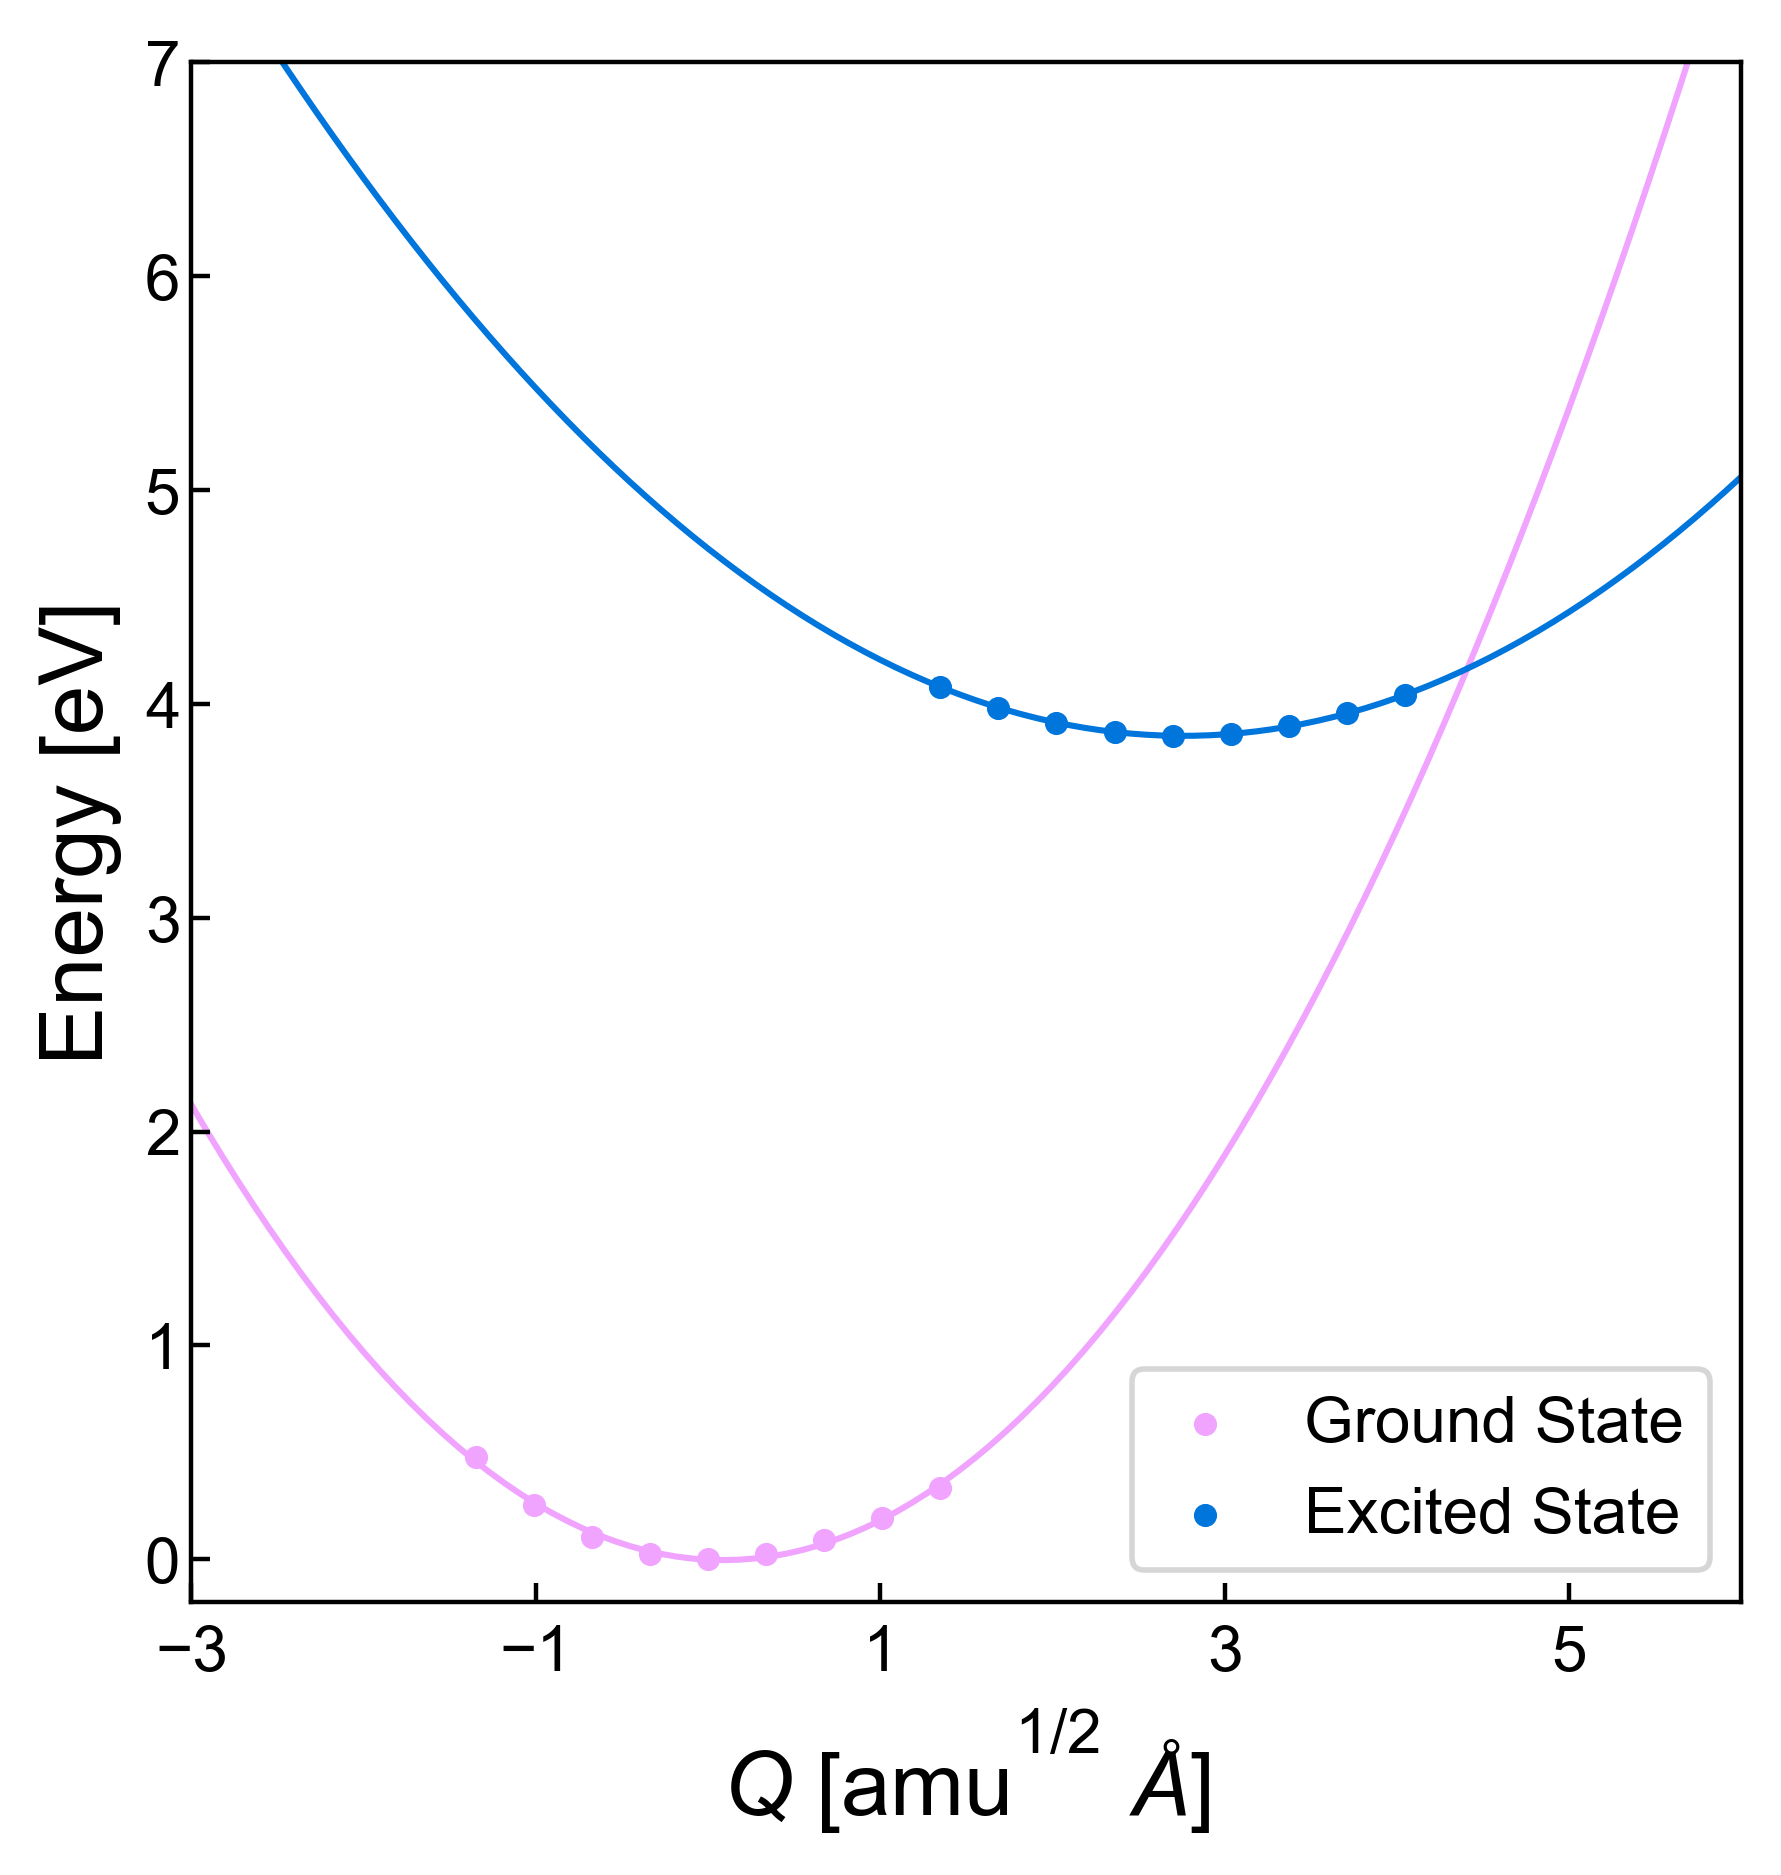

dQ = 2.69709 amu^(1/2) Angstrom
Ground state frequency = 0.04320 eV
Excited state frequency = 0.03103 eV
Absorption Energy: 4.688021 eV
Emission Energy:   2.226136 eV
Franck-Condon shift (excited): 0.838021 eV
Franck-Condon shift (ground):  1.623864 eV


(np.float64(4.688021097477879),
 np.float64(2.2261357076191852),
 np.float64(0.8380210974778787),
 np.float64(1.6238642923808149))

In [8]:
# Initialize
ground_struct = Structure.from_file('./cc_cal/q_-1/CONTCAR')
excited_struct = Structure.from_file('./cc_cal/q_0/CONTCAR')
# Initialize CCD
ccd = ConfigurationCoordinateDiagram(ground_struct, excited_struct)

# Set up calculations
ground_files = Path('./cc_cal/q_-1')
excited_files = Path('./cc_cal/q_0')
output_dir = Path('./cc-set-up2')
displacements = np.linspace(-0.5, 0.5, 9)
# ccd.setup_calculations?
ccd.setup_calculations(displacements=displacements,
                       output_dir=output_dir,
                       ground_input_dir=ground_files,
                       excited_input_dir=excited_files)

# After running calculations...
output_dir = Path('./cc_cal')
ground_vaspruns = sorted(output_dir.glob('ground/*/vasprun.xml')) + ['./cc_cal/q_-1/vasprun.xml']
excited_vaspruns = sorted(output_dir.glob('excited/*/vasprun.xml')) + ['./cc_cal/q_0/vasprun.xml']
dE=3.85

ground_omega, excited_omega = ccd.analyze_ccd(
    ground_vaspruns=ground_vaspruns,
    excited_vaspruns=excited_vaspruns,
    dE=dE,  # Energy difference between minima
#     save_plot='v-ga-cdd.eps'
    xlim=(-3,6),
    ylim=(-0.2,7)
)

print(f'dQ = {ccd.dQ:.5f} amu^(1/2) Angstrom')
print(f'Ground state frequency = {ground_omega:.5f} eV')
print(f'Excited state frequency = {excited_omega:.5f} eV')
ccd.estimate_vertical_transitions(ground_omega=ground_omega, excited_omega=excited_omega, dE=dE)

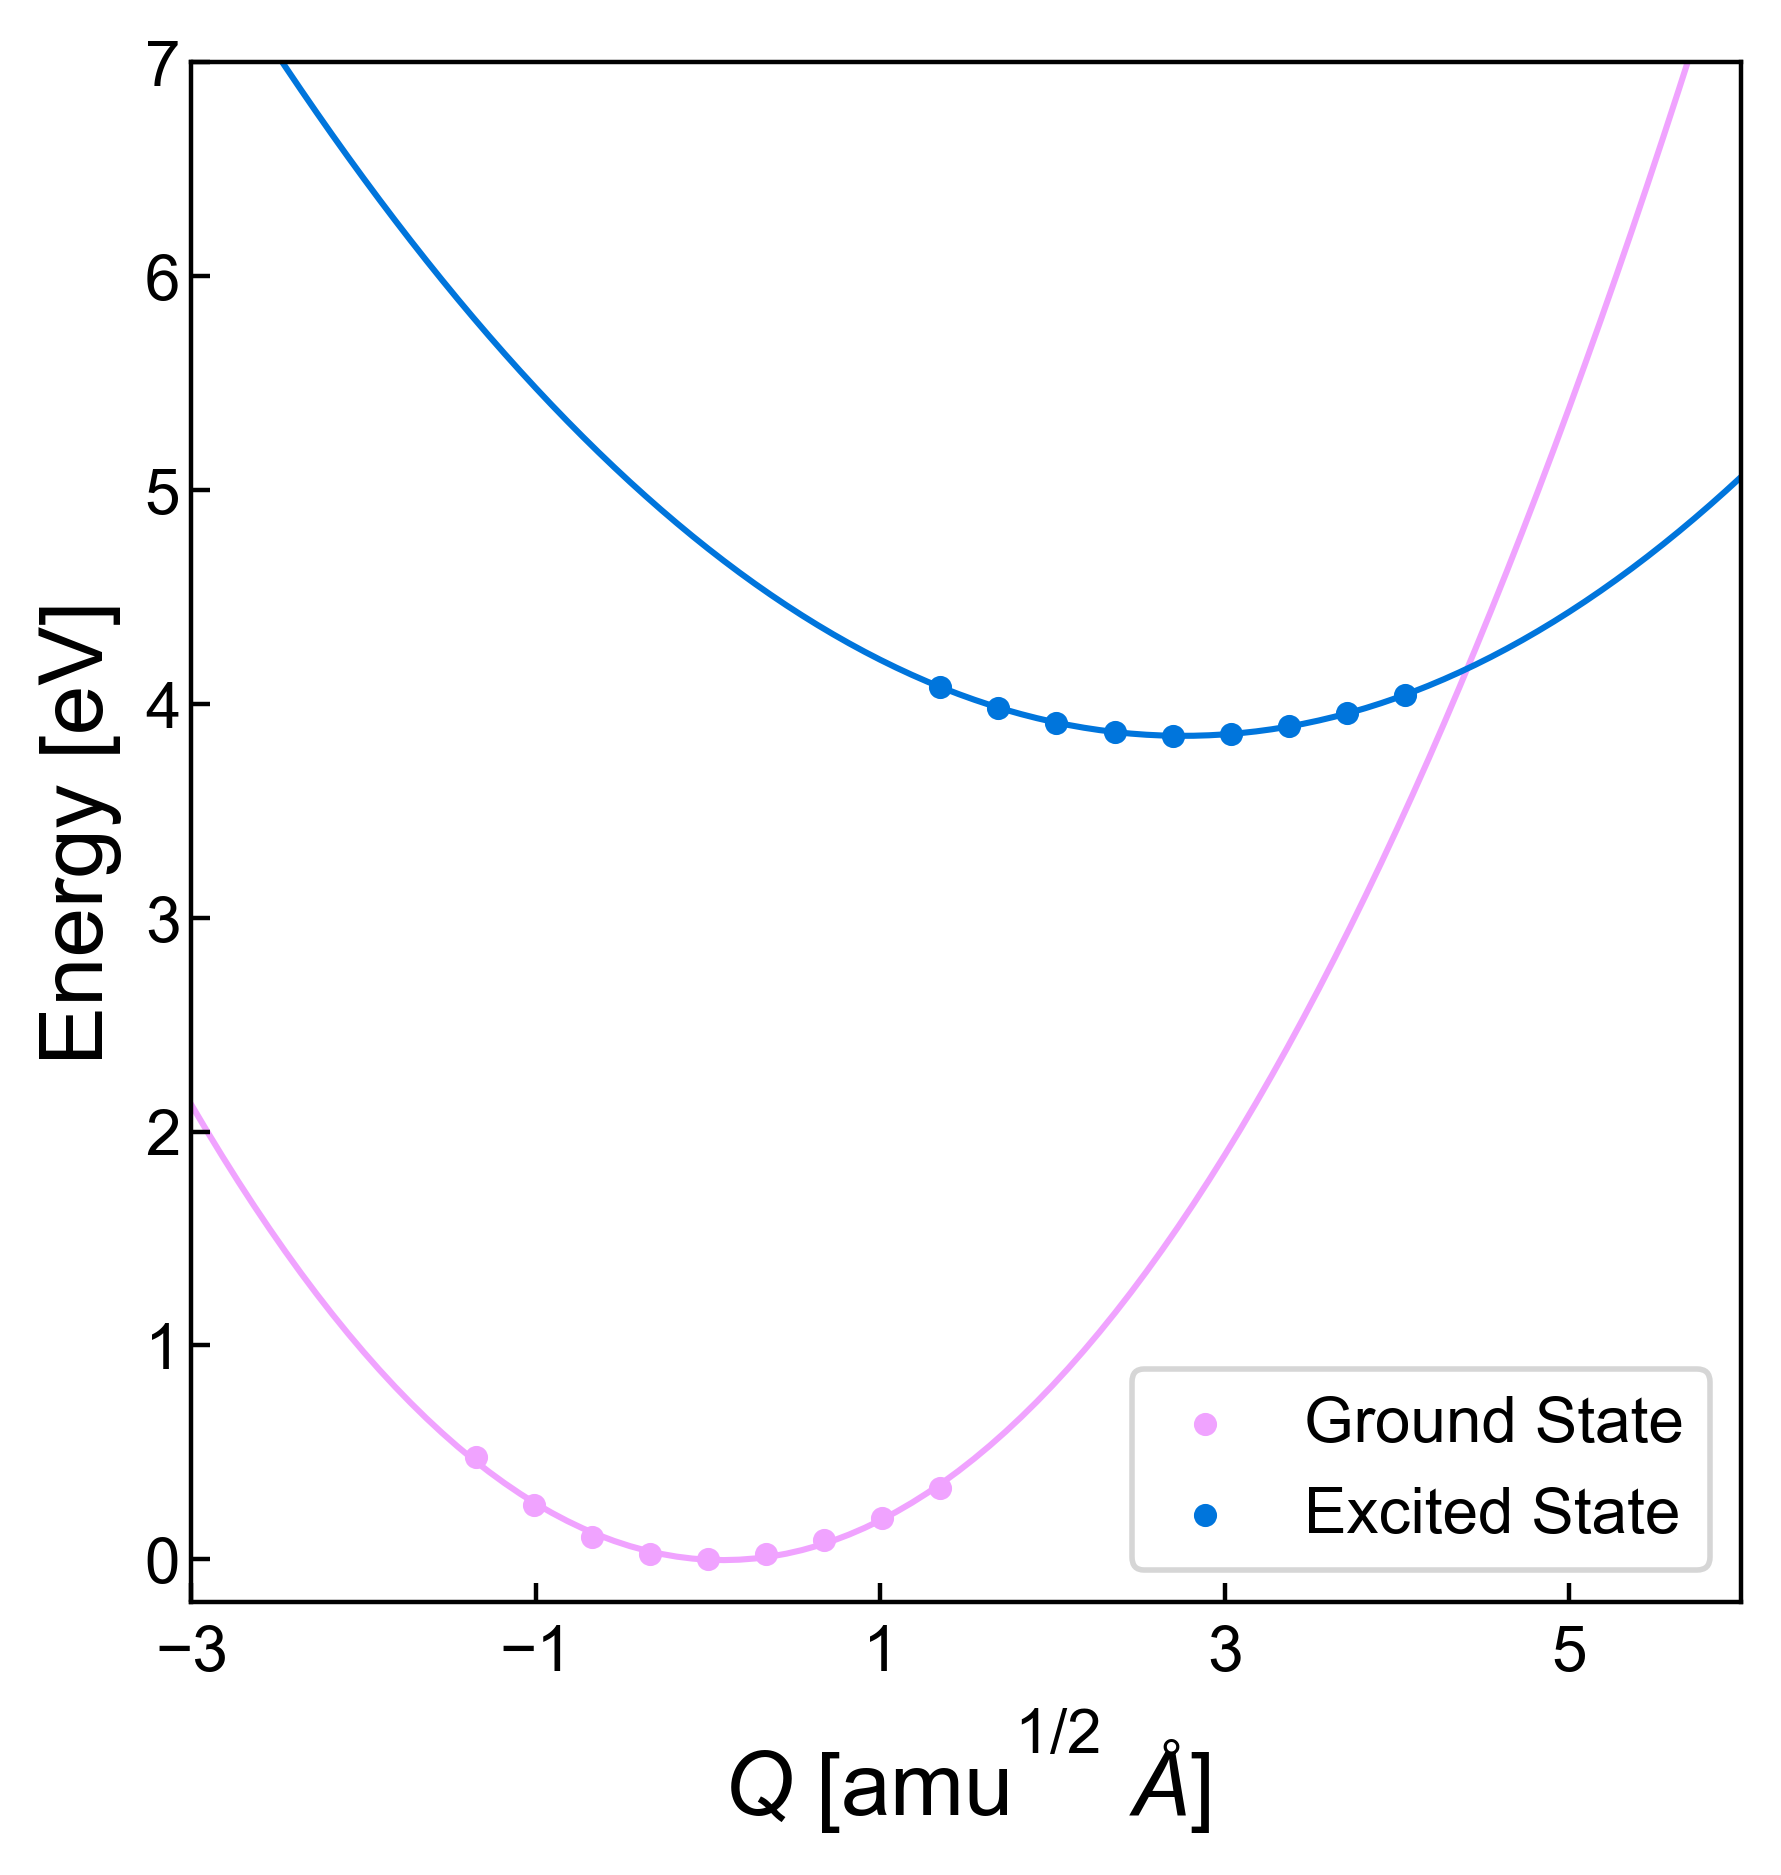

dQ = 2.69709 amu^(1/2) Angstrom
Ground state frequency = 0.04320 eV
Excited state frequency = 0.03103 eV
Absorption Energy: 4.687985 eV
Emission Energy:   2.225861 eV
Franck-Condon shift (excited): 0.837985 eV
Franck-Condon shift (ground):  1.624139 eV


(np.float64(4.687984687778105),
 np.float64(2.2258613412391766),
 np.float64(0.8379846877781049),
 np.float64(1.6241386587608235))

In [9]:
# After running calculations...
output_dir = Path('./cc-set-up2')
ground_vaspruns = sorted(output_dir.glob('ground/*/vasprun.xml')) + ['./cc_cal/q_-1/vasprun.xml']
excited_vaspruns = sorted(output_dir.glob('excited/*/vasprun.xml')) + ['./cc_cal/q_0/vasprun.xml']
dE=3.85

ground_omega, excited_omega = ccd.analyze_ccd(
    ground_vaspruns=ground_vaspruns,
    excited_vaspruns=excited_vaspruns,
    dE=dE,  # Energy difference between minima
#     save_plot='v-ga-cdd.eps'
    xlim=(-3,6),
    ylim=(-0.2,7)
)

print(f'dQ = {ccd.dQ:.5f} amu^(1/2) Angstrom')
print(f'Ground state frequency = {ground_omega:.5f} eV')
print(f'Excited state frequency = {excited_omega:.5f} eV')
ccd.estimate_vertical_transitions(ground_omega=ground_omega, excited_omega=excited_omega, dE=dE)

In [9]:
# import scipy.constants as const
# HBAR = const.hbar /const.e
# EV2J = const.e
# AMU2KG = const.physical_constants['atomic mass constant'][0]

In [11]:
# print(HBAR,EV2J,AMU2KG)

6.582119569509067e-16 1.602176634e-19 1.66053906892e-27
